In [2]:
import pandas as pd

# Load the dataset
file_path = 'Obesity_Data set.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


This dataset includes both behavioral and physical attributes of individuals, such as Gender, Age, Height, Weight, eating habits, and physical activity, to use for predicting obesity levels.

In [3]:
# Reload the dataset to revert to its original form
df_original = pd.read_csv(file_path)

# Data overview
data_shape_original = df_original.shape
data_types_original = df_original.dtypes

# Missing values
missing_values_count_original = df_original.isnull().sum()

# Display the first few rows of the dataframe to understand its initial structure
df_original_head = df_original.head()

data_shape_original, data_types_original, missing_values_count_original, df_original_head

((2111, 17),
 Gender                             object
 Age                               float64
 Height                            float64
 Weight                            float64
 family_history_with_overweight     object
 FAVC                               object
 FCVC                              float64
 NCP                               float64
 CAEC                               object
 SMOKE                              object
 CH2O                              float64
 SCC                                object
 FAF                               float64
 TUE                               float64
 CALC                               object
 MTRANS                             object
 NObeyesdad                         object
 dtype: object,
 Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC             

Dataset Overview
Total Rows: 2111
Total Columns: 17
Data Types:The dataset contains a mix of object (categorical variables), float64 (numerical variables), and a single int64 variable. Specifically, we have categorical variables such as Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, and MTRANS, along with the target variable NObeyesdad.
Missing Values:There are no missing values across any of the columns in the dataset, which simplifies the preprocessing steps since we won't need to impute or remove missing data.
First Few Rows:The first few rows show a variety of features that include both behavioral and physical attributes of individuals, such as Age, Height, Weight, dietary habits (FAVC, FCVC, NCP, CAEC, CH2O, CALC), lifestyle habits (SMOKE, SCC, FAF, TUE), mode of transportation (MTRANS), and the target variable NObeyesdad indicating the obesity level.

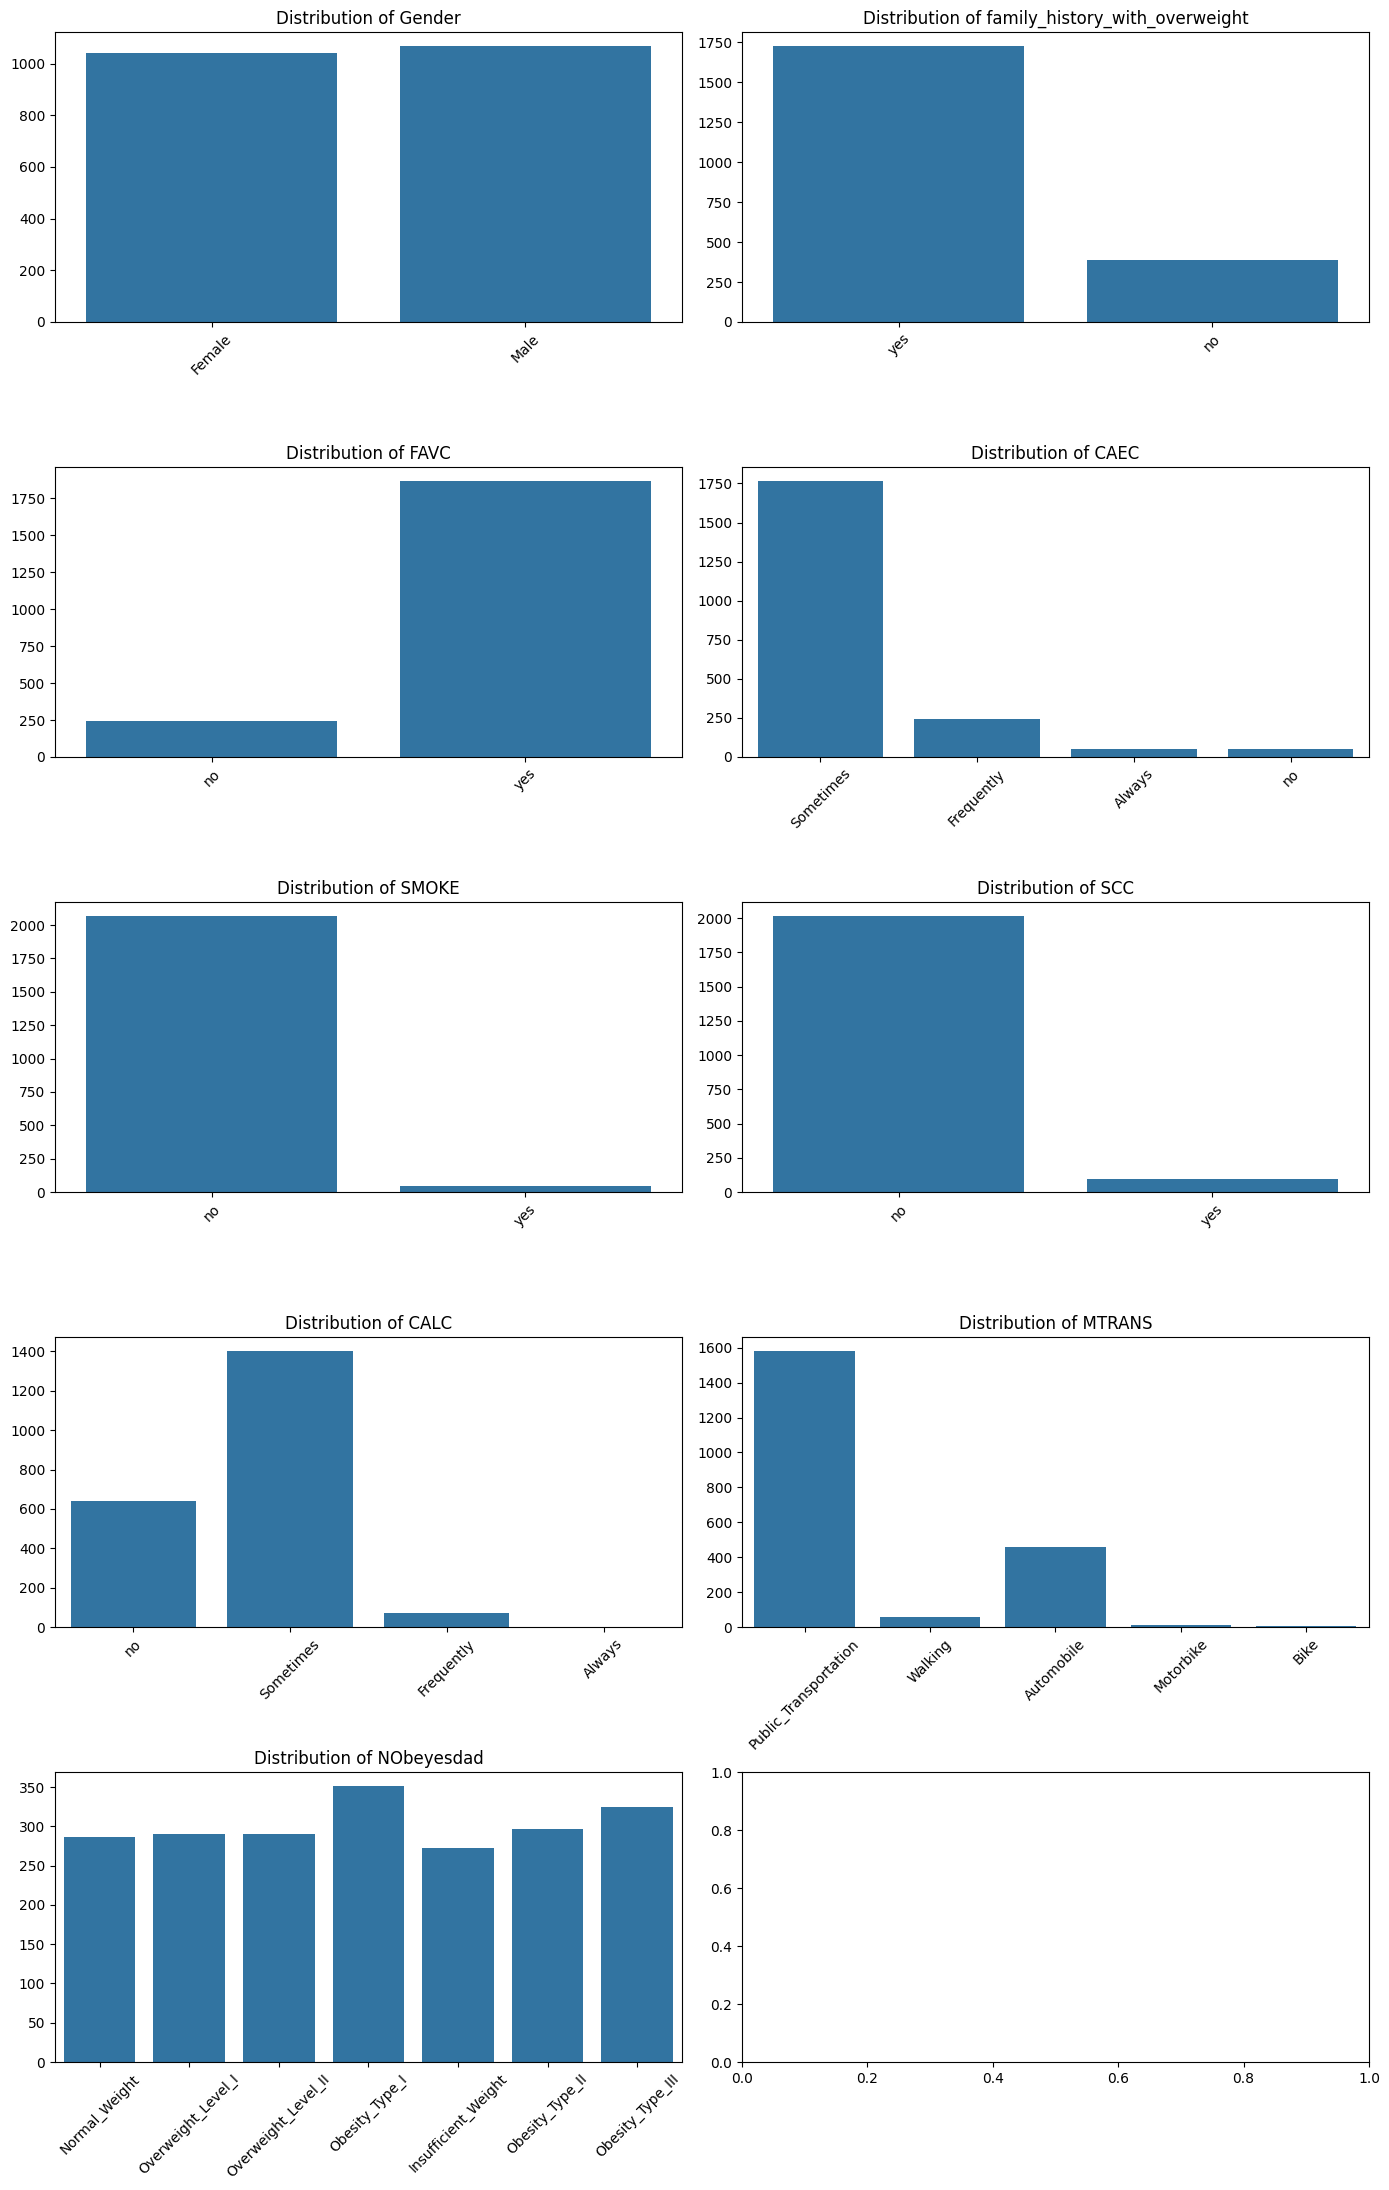

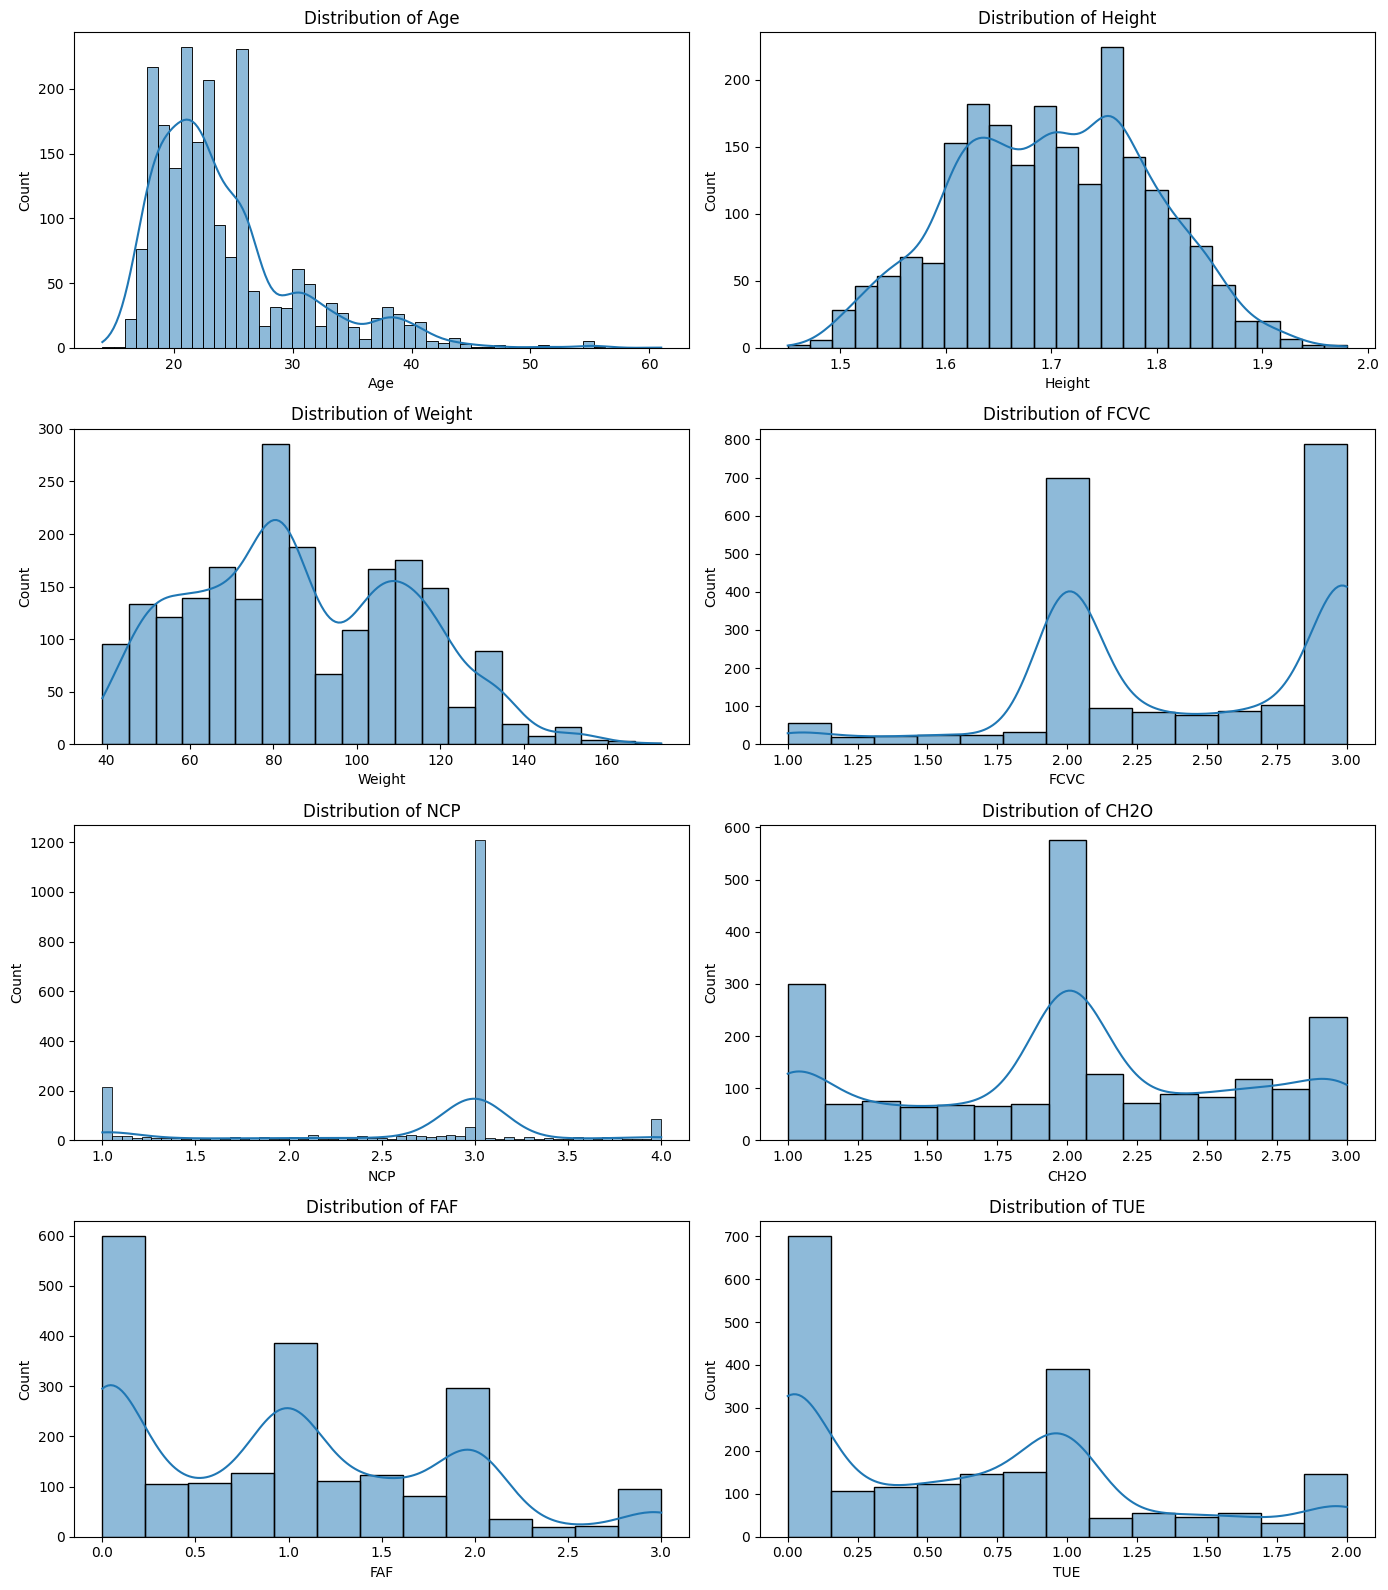

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Visualizing the distribution of categorical variables
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df_original[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyzing the distribution of numerical variables
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df_original[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


Distribution of Categorical Variables
The visualizations reveal the following insights about the categorical variables:
Gender: The dataset has a relatively balanced distribution of male and female participants.
Family History with Overweight: A significant portion of the individuals has a family history of being overweight.
FAVC (Frequent consumption of high caloric food): Most participants frequently consume high caloric food.
CAEC (Consumption of food between meals): The majority of participants sometimes or never consume food between meals.
SMOKE: Smoking is relatively uncommon among the participants.
SCC (Calories consumption monitoring): A minority of participants monitor their calorie consumption.
CALC (Consumption of alcohol): Alcohol consumption varies, with "Sometimes" being the most common response.
MTRANS (Mode of Transportation): Public transportation is the most common mode of transportation among participants.
NObeyesdad (Obesity Level Classification): The dataset includes a diverse distribution of obesity levels, highlighting its utility for training models to predict obesity levels.
Distribution of Numerical Variables
The histograms for numerical variables show:
Age: The distribution is slightly right-skewed, indicating a younger population in the dataset.
Height and Weight: Both show a broad range of values, with height being normally distributed and weight showing a slight right skew.
FCVC (Frequency of consumption of vegetables), NCP (Number of main meals), CH2O (Consumption of water daily): These variables show varied distributions, indicating diverse eating and drinking habits.
FAF (Physical activity frequency): Indicates a right-skewed distribution, suggesting that a lower frequency of physical activity is more common.
TUE (Time using technology devices): Also right-skewed, indicating that most participants spend less time using technology devices.

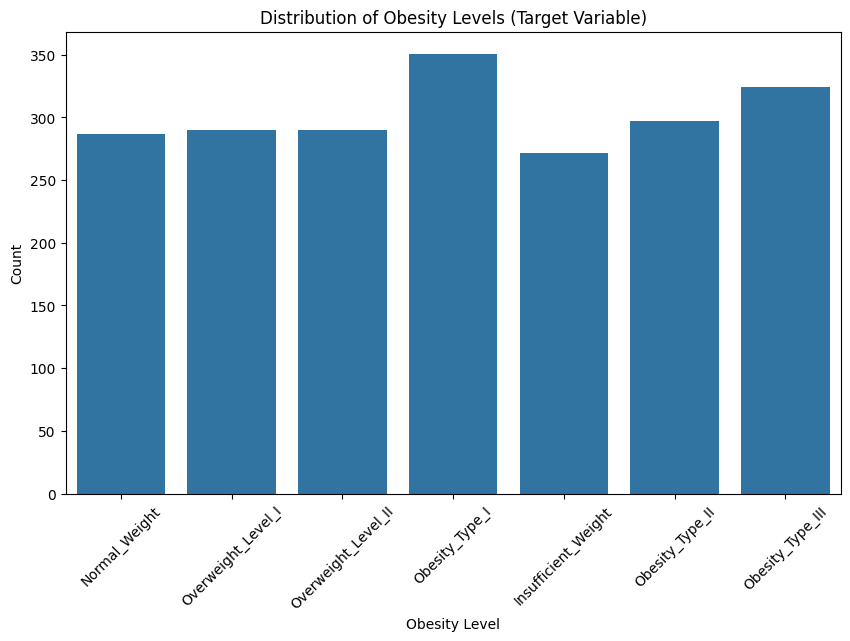

In [5]:
# Visualizing the distribution of the target variable 'NObeyesdad' to understand class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='NObeyesdad')
plt.title('Distribution of Obesity Levels (Target Variable)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In THIS dataset, while there is some imbalance, it is not very severe, as no class is outnumbered by a very large margin.

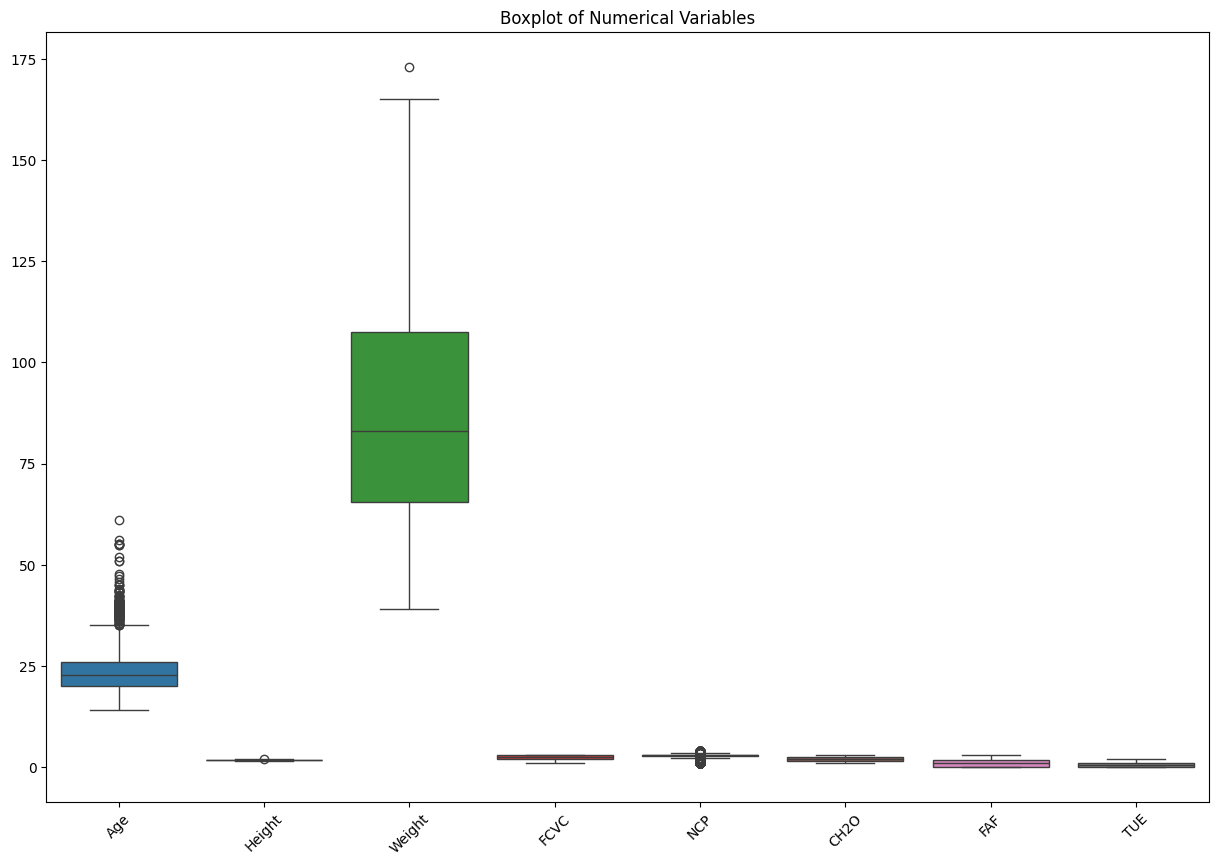

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns
numerical_columns = df_original.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_original[numerical_columns])
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)  
plt.show()


In [26]:
# One-hot encode the categorical variables using pandas.get_dummies()
df_new_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 
                                         'SCC', 'CALC', 'MTRANS'])

# Display the first few rows of the dataframe with the encoded variables
df_new_encoded.head()

# Define the ordinal mapping for the 'NObeyesdad' column
obesity_mapping_updated = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Apply the mapping to the 'NObeyesdad' column
df_new_encoded['NObeyesdad'] = df_new_encoded['NObeyesdad'].map(obesity_mapping_updated)

# Prepare the data for model training
X_new = df_new_encoded.drop('NObeyesdad', axis=1)
y_new = df_new_encoded['NObeyesdad']


In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Create Random Forest classifier as the base estimator
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create BaggingClassifier with Random Forest as the base estimator
bagging_clf = BaggingClassifier(estimator=rf_clf, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_clf.fit(X_train, y_train)

# Predictions
y_pred = bagging_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)

# Classification report
print("Classification Report for Bagging Classifier:")
print(classification_report(y_test, y_pred))


Bagging Classifier Accuracy: 0.9432624113475178
Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.84      0.94      0.89        62
           2       0.91      0.86      0.88        56
           3       0.92      0.94      0.93        50
           4       0.99      0.92      0.95        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for SVM with linear kernel
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization parameter C
}

# Perform grid search for SVM with linear kernel
svm_grid_search = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid_svm, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)

# Get the best SVM model from grid search
best_svm_model = svm_grid_search.best_estimator_

# Predictions
y_pred = best_svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)

# Best parameters for SVM with linear kernel
print("Best parameters for SVM with linear kernel:", svm_grid_search.best_params_)

# Classification report
print("Classification Report for SVM Classifier :")
print(classification_report(y_test, y_pred))


SVM Model Accuracy: 0.966903073286052
Best parameters for SVM with linear kernel: {'C': 100}
Classification Report for SVM Classifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.95      0.89      0.92        62
           2       0.88      0.95      0.91        56
           3       0.98      0.94      0.96        50
           4       0.97      1.00      0.99        78
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Define parameter grid for Gaussian Naive Bayes
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]  # Smoothing parameter
}

# Perform grid search for Gaussian Naive Bayes
gnb_grid_search = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5)
gnb_grid_search.fit(X_train, y_train)

# Get the best Gaussian Naive Bayes model from grid search
best_gnb_model = gnb_grid_search.best_estimator_

# Predictions
y_pred = best_gnb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Model Accuracy:", accuracy)

# Best parameters for Gaussian Naive Bayes
print("Best parameters for Gaussian Naive Bayes:", gnb_grid_search.best_params_)

# Classification report
print("Classification Report for Gaussian Naive Byes Classifier :")
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes Model Accuracy: 0.6453900709219859
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 0.001}
Classification Report for Gaussian Naive Byes Classifier :
              precision    recall  f1-score   support

           0       0.66      0.91      0.77        56
           1       0.59      0.27      0.37        62
           2       0.49      0.45      0.47        56
           3       0.46      0.62      0.53        50
           4       0.70      0.58      0.63        78
           5       0.82      0.71      0.76        58
           6       0.75      1.00      0.86        63

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.63       423
weighted avg       0.65      0.65      0.63       423

